In [1]:
### ARQUIVO FINALIZADO ###

In [2]:
### ROTINA DE TRABALHO: ###

# *Cada arquivo contém somente um dado número de pontos (N = 500; 100; 50; 10);
# *Uma distribuição simulada por arquivo, sendo elas: Bimodal Iguais, Bimodal Maior/Menor e Bimodal Menor/Maior;
# *Cada arquivo com 10 valores de SNR, sendo eles: 100.000, 10.000, 1.000, 100, 10, 1;
# *Serão aplicadas as penalizações 'n' (norma), 'g' (gradiente) e 'c' (curvatura) e também a não-negatividade 'nn0';
# *Segundo a lógica proposta, serão 12 arquivos como este, contendo 72 decaimentos analisados no total;

# mg1 = [[1e-3,0.3,1],[1e-1,0.3,1]]
# mg2 = [[1e-3,0.3,1],[1e-1,0.3,0.5]]
# mg3 = [[1e-3,0.3,0.5],[1e-1,0.3,1]]
# Xi = 1e-4; Xf = 1e0
# Manter a densidade de pontos em 1 pt/ms ou 1000 pts/s

#ARQUIVO 100 PTS

In [1]:
import Laplin as lp
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

In [4]:
def FindOpt(ni,nf,Ns,gi,gf,Gs,ci,cf,Cs,reg):
    #Ajuste Grosso
    Bn = (nf/ni)**(1.0/(Ns-1))
    Bg = (gf/gi)**(1.0/(Gs-1))
    Bc = (cf/ci)**(1.0/(Cs-1))
    Min = 1e10
    for i in range(Ns):
        n=ni*Bn**i
        print "Laço ",n," da varredura em Ns."
        for j in range(Gs):
            g=gi*Bg**j
            for k in range(Cs):
                c=ci*Bc**k
                reg.genY([n,g,c],0,'nn0')
                RMS = lp.rmsDiff(sim.Y,reg.Y)
                if RMS < Min:
                    Min = RMS
                    PRes = [RMS,n,g,c]
                    print 'Última otimização do ajuste grosso: ',PRes
    #Ajuste Fino
    Bn = Bn**(1.0/(Ns-1))
    Bg = Bg**(1.0/(Gs-1))
    Bc = Bc**(1.0/(Cs-1))
    for i in range(Ns):
        n=PRes[1]*Bn**i
        print "Laço ",n," da varredura em N."
        for j in range(Gs):
            g=PRes[2]*Bg**j
            for k in range(Cs):
                c=PRes[3]*Bc**k
                reg.genY([n,g,c],0,'nn0')
                RMS = lp.rmsDiff(sim.Y,reg.Y)
                if RMS < Min:
                    Min = RMS
                    PRes = [RMS,n,g,c]
                    print 'Última otimização do ajuste fino: ',PRes
    return PRes

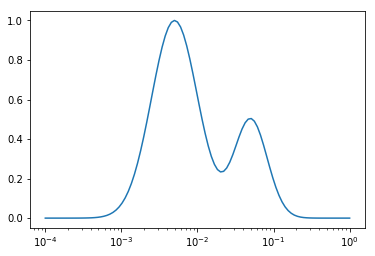

In [5]:
mg = [[5e-3,0.7,1],[5e-2,0.5,0.5]] #[tc, dt, amp]
sim = lp.MultiGauss(mg)
sim.genData(1e-4,1e0,100) #[Xi, Xf, N]
#sim.plotData()

plt.plot(sim.X,sim.Y)
#plt.xlabel('inverse time [s]')
#plt.ylabel('amplitude')
plt.xscale('log')
#plt.grid(True)
#plt.legend(['Dist. Simulada'],loc=0)
plt.savefig('Tabela_Mm_100pt.png',dpi=300)

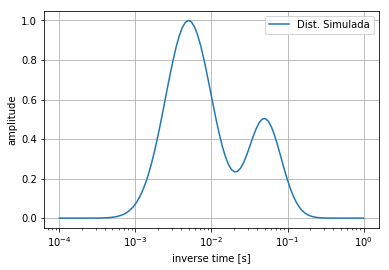

In [5]:
mg = [[5e-3,0.7,1],[5e-2,0.5,0.5]] #[tc, dt, amp]
sim = lp.MultiGauss(mg)
sim.genData(1e-4,1e0,100) #[Xi, Xf, N]
#sim.plotData()

plt.plot(sim.X,sim.Y)
plt.xlabel('inverse time [s]')
plt.ylabel('amplitude')
plt.xscale('log')
plt.grid(True)
plt.legend(['Dist. Simulada'],loc=0)
plt.savefig('Sim_Dist_Mm_100pt.png',dpi=300)

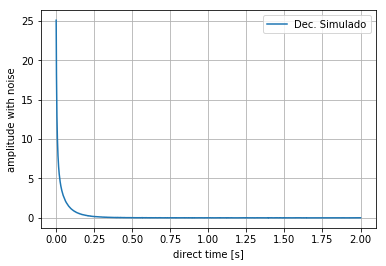

In [6]:
# SNR = 100.000

sig1 = lp.NMRDecay(sim, 'cpmg') #'cpmg'/'invrec'
sig1.genX(1e-4,2,2000) #xi, xf, N
sig1.genY()
sig1.addGaussNoise(1e5)
#sig1.plotData()

plt.plot(sig1.x,sig1.yn)
plt.xlabel('direct time [s]')
plt.ylabel('amplitude with noise')
plt.grid(True)
plt.legend(['Dec. Simulado'],loc=0)
plt.savefig('Sim_Decay_1e5_Mm_100pt.png',dpi=300)

In [5]:
reg1 = lp.InvLaplace(sig1, 0) #0=cpmg/1=invrec
reg1.genX(1e-4,1e0,100) #Xi, Xf, N

Opt1 = FindOpt(1e-8,2,10,1e-8,2,10,1e-8,2,10,reg1)
print Opt1

Laço  1e-08  da varredura em Ns.
Última otimização do ajuste grosso:  [1.0376689310499356, 1e-08, 1e-08, 1e-08]
Última otimização do ajuste grosso:  [1.0277913099324107, 1e-08, 1e-08, 8.362510309503733e-08]
Última otimização do ajuste grosso:  [0.4354113140215662, 1e-08, 1e-08, 6.993157867655623e-07]
Última otimização do ajuste grosso:  [0.20924457911398928, 1e-08, 1e-08, 5.848035476425729e-06]
Última otimização do ajuste grosso:  [0.10975998828361609, 1e-08, 1e-08, 4.8904256961953734e-05]
Última otimização do ajuste grosso:  [0.03782410221093756, 1e-08, 1e-08, 0.0004089623530229578]
Última otimização do ajuste grosso:  [0.011603168339705913, 1e-08, 1e-08, 0.00341995189335339]
Última otimização do ajuste grosso:  [0.006359305326448467, 1e-08, 1e-08, 0.028599382966174536]
Última otimização do ajuste grosso:  [0.006359220864528126, 1e-08, 6.993157867655623e-07, 0.028599382966174536]
Última otimização do ajuste grosso:  [0.00635880083693271, 1e-08, 5.848035476425729e-06, 0.028599382966174

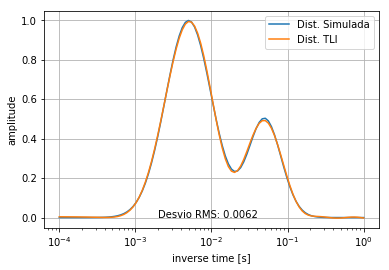

In [7]:
reg1 = lp.InvLaplace(sig1, 0) #0=cpmg/1=invrec
reg1.genX(1e-4,1e0,100) #Xi, Xf, N
reg1.genY([1.2661403572124612e-08, 0.00341995189335339, 0.07349944682476113], 0, 'nn0') #[N,G,C], 0=noTSVD/1=TSVD, '0'/'nn0'/'nnx'/'x'
#sim.plotData()
#reg1.plotData()
#plt.show()
#print 'Desvio quadrático médio:', '{:.2e}'.format(lp.rmsDiff(sim.Y, reg1.Y))

plt.plot(sim.X,sim.Y)
plt.plot(reg1.X,reg1.Y)
plt.xlabel('inverse time [s]')
plt.ylabel('amplitude')
plt.xscale('log')
plt.grid(True)
plt.legend(['Dist. Simulada','Dist. TLI'],loc=0)
plt.text(0.002,0,'Desvio RMS: 0.0062')
plt.savefig('Sim_Comp_1e5_Mm_100pt.png',dpi=300)

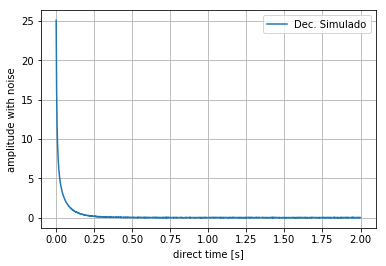

In [8]:
# SNR = 10.000

sig2 = lp.NMRDecay(sim, 'cpmg') #'cpmg'/'invrec'
sig2.genX(1e-4,2,2000) #xi, xf, N
sig2.genY()
sig2.addGaussNoise(1e4)
#sig2.plotData()

plt.plot(sig2.x,sig2.yn)
plt.xlabel('direct time [s]')
plt.ylabel('amplitude with noise')
plt.grid(True)
plt.legend(['Dec. Simulado'],loc=0)
plt.savefig('Sim_Decay_1e4_Mm_100pt.png',dpi=300)

In [9]:
reg2 = lp.InvLaplace(sig2, 0) #0=cpmg/1=invrec
reg2.genX(1e-4,1e0,100) #Xi, Xf, N

Opt2 = FindOpt(1e-8,2,10,1e-8,2,10,1e-8,4,10,reg2)
print Opt2

Laço  1e-08  da varredura em Ns.
Última otimização do ajuste grosso:  [1.140912257253404, 1e-08, 1e-08, 1e-08]
Última otimização do ajuste grosso:  [0.8177975151595019, 1e-08, 1e-08, 9.032010701366822e-08]
Última otimização do ajuste grosso:  [0.5862354238991007, 1e-08, 1e-08, 8.15772173096048e-07]
Última otimização do ajuste grosso:  [0.435848329054262, 1e-08, 1e-08, 7.368062997280772e-06]
Última otimização do ajuste grosso:  [0.25479212355308206, 1e-08, 1e-08, 6.654842383978484e-05]
Última otimização do ajuste grosso:  [0.14620697224894064, 1e-08, 1e-08, 0.0006010660762800316]
Última otimização do ajuste grosso:  [0.06924322184040788, 1e-08, 1e-08, 0.005428835233189812]
Última otimização do ajuste grosso:  [0.03742335075060743, 1e-08, 1e-08, 0.04903329792212763]
Última otimização do ajuste grosso:  [0.015713803687341037, 1e-08, 1e-08, 0.4428692715559643]
Última otimização do ajuste grosso:  [0.015713797170415513, 1e-08, 8.362510309503733e-08, 0.4428692715559643]
Última otimização do 

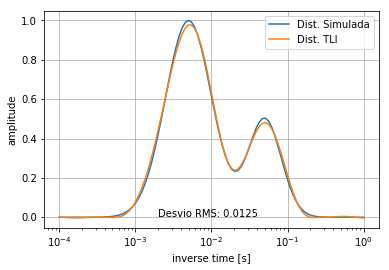

In [9]:
reg2 = lp.InvLaplace(sig2, 0) #0=cpmg/1=invrec
reg2.genX(1e-4,1e0,100) #Xi, Xf, N
reg2.genY([1.2661403572124612e-08, 0.028599382966174536, 1.1777920914856785], 0, 'nn0') #[N,G,C], 0=noTSVD/1=TSVD, '0'/'nn0'/'nnx'/'x'
#sim.plotData()
#reg2.plotData()
#plt.show()
#print 'Desvio quadrático médio:', '{:.2e}'.format(lp.rmsDiff(sim.Y, reg2.Y))

plt.plot(sim.X,sim.Y)
plt.plot(reg2.X,reg2.Y)
plt.xlabel('inverse time [s]')
plt.ylabel('amplitude')
plt.xscale('log')
plt.grid(True)
plt.legend(['Dist. Simulada','Dist. TLI'],loc=0)
plt.text(0.002,0,'Desvio RMS: 0.0125')
plt.savefig('Sim_Comp_1e4_Mm_100pt.png',dpi=300)

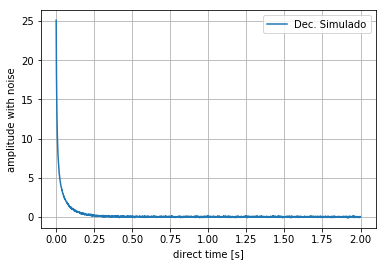

In [10]:
# SNR = 1.000

sig3 = lp.NMRDecay(sim, 'cpmg') #'cpmg'/'invrec'
sig3.genX(1e-4,2,2000) #xi, xf, N
sig3.genY()
sig3.addGaussNoise(1e3)
#sig3.plotData()

plt.plot(sig3.x,sig3.yn)
plt.xlabel('direct time [s]')
plt.ylabel('amplitude with noise')
plt.grid(True)
plt.legend(['Dec. Simulado'],loc=0)
plt.savefig('Sim_Decay_1e3_Mm_100pt.png',dpi=300)

In [13]:
reg3 = lp.InvLaplace(sig3, 0) #0=cpmg/1=invrec
reg3.genX(1e-4,1e0,100) #Xi, Xf, N

Opt3 = FindOpt(1e-8,2,10,1e-8,2,10,1e-8,5,10,reg3)
print Opt3

Laço  1e-08  da varredura em Ns.
Última otimização do ajuste grosso:  [1.2654953917980434, 1e-08, 1e-08, 1e-08]
Última otimização do ajuste grosso:  [1.245981392327484, 1e-08, 1e-08, 9.258747122872903e-08]
Última otimização do ajuste grosso:  [1.1129440440495122, 1e-08, 1e-08, 8.572439828530725e-07]
Última otimização do ajuste grosso:  [0.6443884680211649, 1e-08, 1e-08, 7.937005259840993e-06]
Última otimização do ajuste grosso:  [0.4341739784824146, 1e-08, 1e-08, 7.348672461377989e-05]
Última otimização do ajuste grosso:  [0.2560998508556355, 1e-08, 1e-08, 0.0006803950000871878]
Última otimização do ajuste grosso:  [0.14728725147914115, 1e-08, 1e-08, 0.0062996052494743585]
Última otimização do ajuste grosso:  [0.04647566670825368, 1e-08, 1e-08, 0.05832645197880575]
Última otimização do ajuste grosso:  [0.020901416246040676, 1e-08, 1e-08, 0.5400298694461523]
Última otimização do ajuste grosso:  [0.020901412432330076, 1e-08, 8.362510309503733e-08, 0.5400298694461523]
Última otimização do

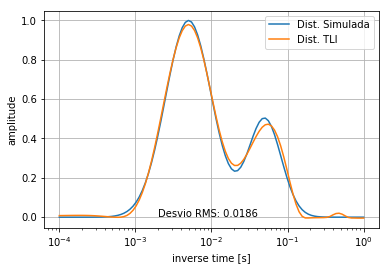

In [11]:
reg3 = lp.InvLaplace(sig3, 0) #0=cpmg/1=invrec
reg3.genX(1e-4,1e0,100) #Xi, Xf, N
reg3.genY([0.00341995189335339, 0.028599382966174536, 1.133970759124303], 0, 'nn0') #[N,G,C], 0=noTSVD/1=TSVD, '0'/'nn0'/'nnx'/'x'
#sim.plotData()
#reg3.plotData()
#plt.show()
#print 'Desvio quadrático médio:', '{:.2e}'.format(lp.rmsDiff(sim.Y, reg3.Y))

plt.plot(sim.X,sim.Y)
plt.plot(reg3.X,reg3.Y)
plt.xlabel('inverse time [s]')
plt.ylabel('amplitude')
plt.xscale('log')
plt.grid(True)
plt.legend(['Dist. Simulada','Dist. TLI'],loc=0)
plt.text(0.002,0,'Desvio RMS: 0.0186')
plt.savefig('Sim_Comp_1e3_Mm_100pt.png',dpi=300)

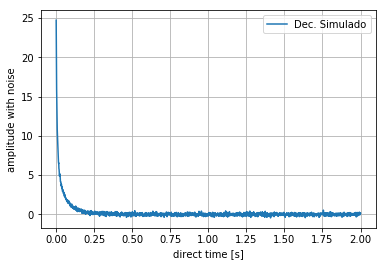

In [12]:
# SNR = 100

sig4 = lp.NMRDecay(sim, 'cpmg') #'cpmg'/'invrec'
sig4.genX(1e-4,2,2000) #xi, xf, N
sig4.genY()
sig4.addGaussNoise(1e2)
#sig4.plotData()

plt.plot(sig4.x,sig4.yn)
plt.xlabel('direct time [s]')
plt.ylabel('amplitude with noise')
plt.grid(True)
plt.legend(['Dec. Simulado'],loc=0)
plt.savefig('Sim_Decay_1e2_Mm_100pt.png',dpi=300)

In [36]:
reg4 = lp.InvLaplace(sig4, 0) #0=cpmg/1=invrec
reg4.genX(1e-4,1e0,100) #Xi, Xf, N

Opt4 = FindOpt(1e-8,2,10,1e-8,4,10,1e-8,77,10,reg4)
print Opt4

Laço  1e-08  da varredura em Ns.
Última otimização do ajuste grosso:  [1.3201706787871594, 1e-08, 1e-08, 1e-08]
Última otimização do ajuste grosso:  [1.2675594354972304, 1e-08, 1e-08, 1.2545817608602508e-07]
Última otimização do ajuste grosso:  [0.8558854221411571, 1e-08, 1e-08, 1.974680822212366e-05]
Última otimização do ajuste grosso:  [0.569395195787586, 1e-08, 1e-08, 0.0002477398543068158]
Última otimização do ajuste grosso:  [0.3214502515599035, 1e-08, 1e-08, 0.003108099026515069]
Última otimização do ajuste grosso:  [0.11497141059660644, 1e-08, 1e-08, 0.03899364349613306]
Última otimização do ajuste grosso:  [0.060905621945058094, 1e-08, 1e-08, 0.48920713919735476]
Última otimização do ajuste grosso:  [0.03128413160658934, 1e-08, 1e-08, 6.137503541196231]
Última otimização do ajuste grosso:  [0.0312841293339822, 1e-08, 9.032010701366822e-08, 6.137503541196231]
Última otimização do ajuste grosso:  [0.031284108808861434, 1e-08, 8.15772173096048e-07, 6.137503541196231]
Última otimiz

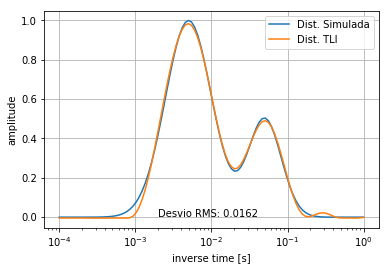

In [13]:
reg4 = lp.InvLaplace(sig4, 0) #0=cpmg/1=invrec
reg4.genX(1e-4,1e0,100) #Xi, Xf, N
reg4.genY([0.03621083296484821, 0.5655536626848444, 8.1291885496028], 0, 'nn0') #[N,G,C], 0=noTSVD/1=TSVD, '0'/'nn0'/'nnx'/'x'
#sim.plotData()
#reg4.plotData()
#plt.show()
#print 'Desvio quadrático médio:', '{:.2e}'.format(lp.rmsDiff(sim.Y, reg4.Y))

plt.plot(sim.X,sim.Y)
plt.plot(reg4.X,reg4.Y)
plt.xlabel('inverse time [s]')
plt.ylabel('amplitude')
plt.xscale('log')
plt.grid(True)
plt.legend(['Dist. Simulada','Dist. TLI'],loc=0)
plt.text(0.002,0,'Desvio RMS: 0.0162')
plt.savefig('Sim_Comp_1e2_Mm_100pt.png',dpi=300)

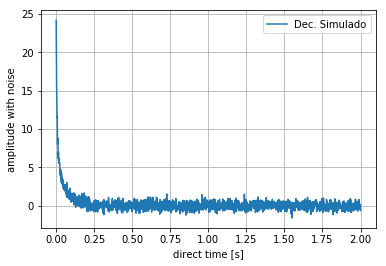

In [14]:
# SNR = 10

sig5 = lp.NMRDecay(sim, 'cpmg') #'cpmg'/'invrec'
sig5.genX(1e-4,2,2000) #xi, xf, N
sig5.genY()
sig5.addGaussNoise(10)
#sig5.plotData()

plt.plot(sig5.x,sig5.yn)
plt.xlabel('direct time [s]')
plt.ylabel('amplitude with noise')
plt.grid(True)
plt.legend(['Dec. Simulado'],loc=0)
plt.savefig('Sim_Decay_1e1_Mm_100pt.png',dpi=300)

In [56]:
reg5 = lp.InvLaplace(sig5, 0) #0=cpmg/1=invrec
reg5.genX(1e-4,1e0,100) #Xi, Xf, N

Opt5 = FindOpt(1e-8,2,10,1e-8,20,10,1e-8,602,10,reg5)
print Opt5

Laço  1e-08  da varredura em Ns.
Última otimização do ajuste grosso:  [1.4676968177526077, 1e-08, 1e-08, 1e-08]
Última otimização do ajuste grosso:  [1.4608360268792469, 1e-08, 1e-08, 1.5766414625889274e-07]
Última otimização do ajuste grosso:  [1.4268374340776542, 1e-08, 1e-08, 2.485798301554552e-06]
Última otimização do ajuste grosso:  [1.0910288684239415, 1e-08, 1e-08, 3.91921266986404e-05]
Última otimização do ajuste grosso:  [0.7451402292225324, 1e-08, 1e-08, 0.0006179193196011497]
Última otimização do ajuste grosso:  [0.5296012742997851, 1e-08, 1e-08, 0.009742372198179115]
Última otimização do ajuste grosso:  [0.3353496082954704, 1e-08, 1e-08, 0.1536022795162282]
Última otimização do ajuste grosso:  [0.1216777928829347, 1e-08, 1e-08, 2.4217572263345932]
Última otimização do ajuste grosso:  [0.05842765819776108, 1e-08, 1e-08, 38.18242855363477]
Última otimização do ajuste grosso:  [0.05842765721799873, 1e-08, 1.0800597388923061e-07, 38.18242855363477]
Última otimização do ajuste g

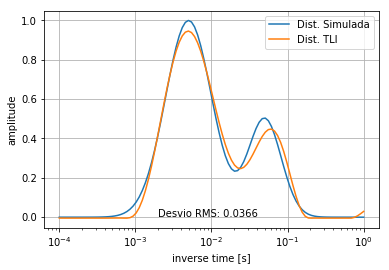

In [15]:
reg5 = lp.InvLaplace(sig5, 0) #0=cpmg/1=invrec
reg5.genX(1e-4,1e0,100) #Xi, Xf, N
reg5.genY([0.23916263490008, 0.17144879657061446, 95.7431831518214], 0, 'nn0') #[N,G,C], 0=noTSVD/1=TSVD, '0'/'nn0'/'nnx'/'x'
#sim.plotData()
#reg5.plotData()
#plt.show()
#print 'Desvio quadrático médio:', '{:.2e}'.format(lp.rmsDiff(sim.Y, reg5.Y))

plt.plot(sim.X,sim.Y)
plt.plot(reg5.X,reg5.Y)
plt.xlabel('inverse time [s]')
plt.ylabel('amplitude')
plt.xscale('log')
plt.grid(True)
plt.legend(['Dist. Simulada','Dist. TLI'],loc=0)
plt.text(0.002,0,'Desvio RMS: 0.0366')
plt.savefig('Sim_Comp_1e1_Mm_100pt.png',dpi=300)